Datos de la tabla “boston_house_price”. 

CRIM: Índice de criminalidad per cápita 

ZN: Proporción de superficie residencial establecida en lotes mayores de 25.000 s.f. (equivalente a 2.223 metros cuadrados). 

INDUS: Proporción de superficie de negocio no minorista. 

CHAS: Es la variable ficticia “río Charles” (igual a 1 si el tramo considerado está en la ribera del río, 0 en el otro caso) 

NOX: Concentración de óxidos de nitrógeno (partes por 10 millones) 

RM: Número promedio de habitaciones por vivienda 

AGE: Proporción de viviendas en propiedad ocupadas, construidas antes de 1940 

DIS: Distancias ponderadas a cinco centros de empleo de Boston 

RAD: Índice de accesibilidad a las autopistas radiales 

TAX: Parte del impuesto de bienes inmuebles por cada 10.000 $ de propiedad 

PTRATIO: Ratio de alumnos por profesor 

B: Se calcula como 1000(Bk — 0.63)², donde Bk es la proporción de personas de descendencia Afroamericana 

LSTAT: Porcentaje de población de “estatus de bajo nivel” 

PRICE: Valor de viviendas en propiedad (en miles de dólares) 

Existe una correlación entre la columna NOX y las columnas DIS, RAD e INDUS. Esta correlación tiene sentido si mirarnos las actividades que crean óxido de nitrógeno principalmente (combustión de los motores de vehículos lo que lo relaciona con DIS y RAD, e INDUS que se refería a la superficie dedicada a negocios no minoristas, como por ejemplo la Industria, el Transporte o la Ganaderia).

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt 
#import geopandas as gpd
import folium 
import geocoder # pip install geocoder
from wordcloud import WordCloud
import scipy as stats
from vega_datasets import data as vds # pip install vega_datasets 
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

Pruebas de esta correlación:

In [2]:
data = pd.read_csv('./data/boston_house_prices.csv')
df_boston = pd.DataFrame(data)

-0.7692301132258278
0.6114405634855773
0.7636514469209147


<Axes: >

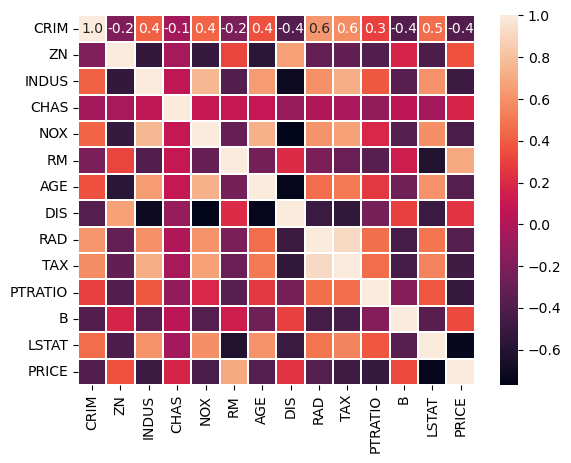

In [3]:
print(df_boston["NOX"].corr(df_boston["DIS"]))
print(df_boston["NOX"].corr(df_boston["RAD"]))
print(df_boston["NOX"].corr(df_boston["INDUS"]))
sns.heatmap(df_boston.corr(),annot=True, fmt=".1f", linewidths="0.2")


La correlación que existe entre NOX y TAX o LSTAT no es tan relevante, en cuanto las dos últimas variables dependen de la riqueza de la zona (impuestos y porcentaje de personas con bajos ingresos en la zona). Es decir, son parametros que informan indirectamente de la riqueza de la zona, la cual viene determinada por parametros que informan sobre los tipos de negocios y comercios de la zona (INDUS), el acceso a infraestructuras y transporte (RAD), y el valor de las propiedades (PRICE).

Hay una correlacion entre un mayor acceso a la autopista radial (RAD) y mayores niveles de óxido de nitrogeno (NOX).

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



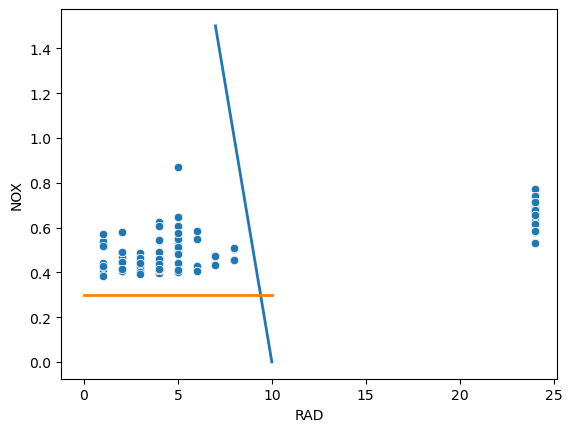

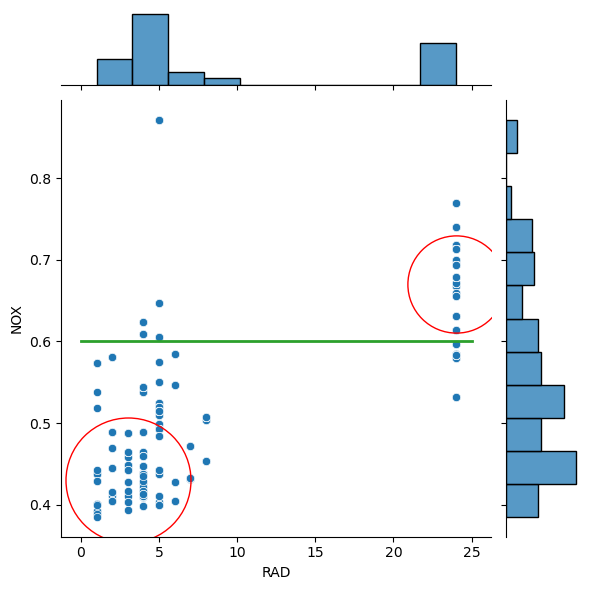

In [4]:
graf = sns.scatterplot(x = df_boston["RAD"], y = df_boston["NOX"])
plt.plot([7, 10], [1.5, 0], linewidth=2)
plt.plot([0, 10], [0.3, 0.3], linewidth=2)
a = sns.jointplot(x=df_boston["RAD"], y=df_boston["NOX"], data=df_boston)
a.ax_joint.plot([3],[0.43],'o',ms=90 , mec='r', mfc='none')
a.ax_joint.plot([24],[0.67],'o',ms=70 , mec='r', mfc='none')
plt.plot([0, 25], [0.6, 0.6], linewidth=2)

Viendo este último gráfico, vemos que hay una agrupación a la izquierda de zonas más alejadas de la autopista radial y, por lo tanto, suponemos con una menor cantidad de vehiculos circulando y, sobre todo, más cercanas al centro de la ciudad. 
Por otro lado, a la derecha vemos varias zonas con mucha accesibilidad a la autopista radial. El lugar donde suelen encontrarse las zonas industriales, en el extrarradio de las ciudades. Casualmente, estas zonas tienen mayores cantidades de NOX que la mayoria de las zonas mostradas a la izquierda.

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



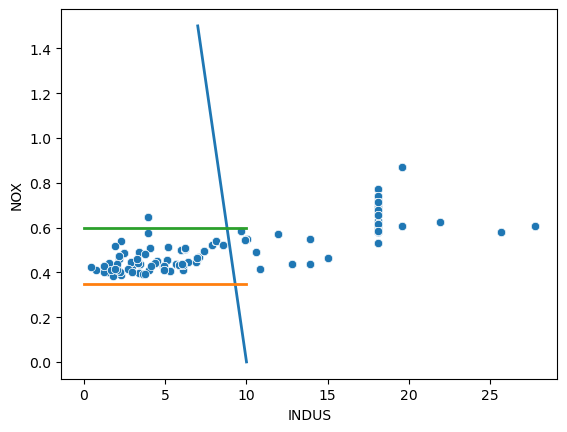

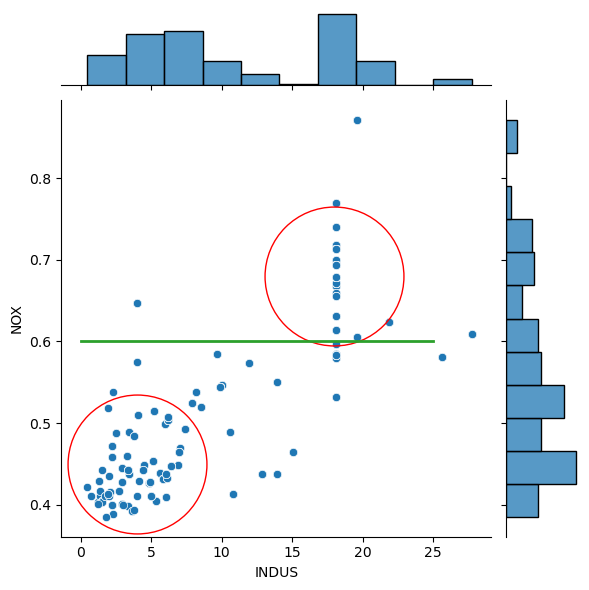

In [5]:
graf = sns.scatterplot(x = df_boston["INDUS"], y = df_boston["NOX"])
plt.plot([7, 10], [1.5, 0], linewidth=2)
plt.plot([0, 10], [0.35, 0.35], linewidth=2)
plt.plot([0, 10], [0.6, 0.6], linewidth=2)
a = sns.jointplot(x=df_boston["INDUS"], y=df_boston["NOX"], data=df_boston)
a.ax_joint.plot([4],[0.45],'o',ms=100 , mec='r', mfc='none')
a.ax_joint.plot([18],[0.68],'o',ms=100 , mec='r', mfc='none')
plt.plot([0, 25], [0.6, 0.6], linewidth=2)

Con la correlación entre INDUS Y NOX pasa lo mismo, cuanto mayor uso de la superficie para negocios "no minoristas", una mayor cantidad de óxido de nitrogeno.

¿Pero qué ocurre con DIS (la distancia que existe entre cualquiera de las zonas y un centro de empleo)? Pues asumiendo que los centros de empleo se suelen encontrar en los centros atestados de las ciudades o en hubs específicos, es decir, se encuentran concentrados en ciertos lugares, parece sensato concluir que cuanto más cerca de un centro de empleo habra más vehiculos en circulación. Así aumentando el NOX, pero al no encontarse estas zonas cerca de actividades industriales podria darse un efecto de disminución simultaneo del NOX. Así podría haber un aumento pequeño del NOX.

<Axes: xlabel='DIS', ylabel='NOX'>

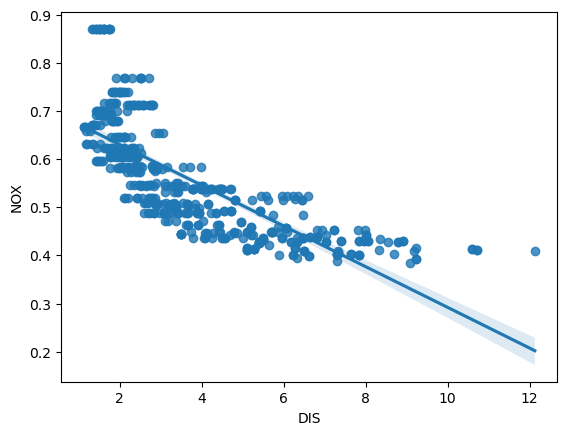

In [6]:
sns.regplot(x=df_boston["DIS"], y=df_boston["NOX"])

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



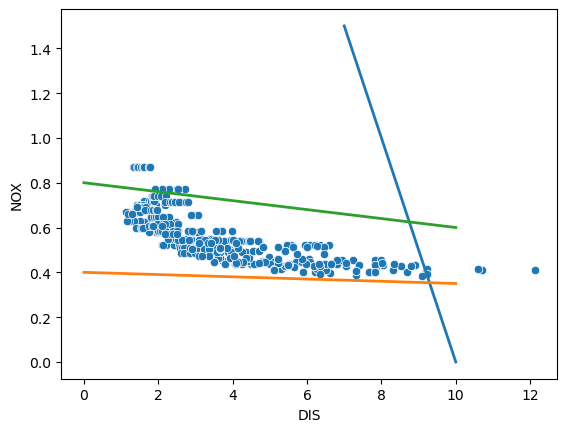

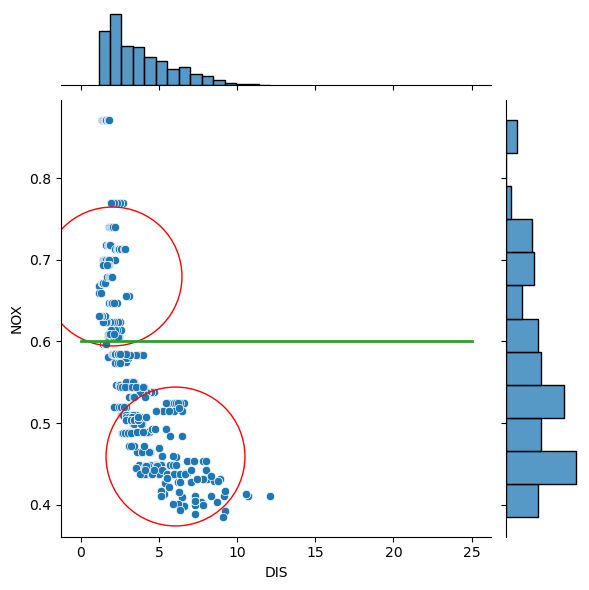

In [7]:
graf = sns.scatterplot(x = df_boston["DIS"], y = df_boston["NOX"])
plt.plot([7, 10], [1.5, 0], linewidth=2)
plt.plot([0, 10], [0.4, 0.35], linewidth=2)
plt.plot([0, 10], [0.8, 0.6], linewidth=2)
a = sns.jointplot(x=df_boston["DIS"], y=df_boston["NOX"], data=df_boston)
a.ax_joint.plot([6],[0.46],'o',ms=100 , mec='r', mfc='none')
a.ax_joint.plot([2],[0.68],'o',ms=100 , mec='r', mfc='none')
plt.plot([0, 25], [0.6, 0.6], linewidth=2)

Parece que esta linea de razonamiento tal vez tenga algo de mérito, sin embargo, ha de relacionarse todo lo anterior con los datos geográficos de la ciudad para confirmar esta hipótesis.

Primero, veamos los barrios o distritos de la ciudad de Boston con algunas de las zonas/viviendas que hemos podido localizar geograficamente.

In [8]:
mapa_boston = folium.Map(location =[42.3554334,-71.060511],zoom_start=11)
folium.GeoJson('Boston_data_geo\Boston_Neighborhoods.geojson').add_to(mapa_boston)
mapa_boston
data_2 = pd.read_csv('Boston_data_geo/boston.csv')
df_boston_2 = pd.DataFrame(data_2)
df_boston_2.info()

for i,columna in df_boston.iterrows():
    folium.Marker(location=[(df_boston_2['LON']),(df_boston_2["LAT"])]).add_to(mapa_boston)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   TOWN     132 non-null    object 
 1   LAT      132 non-null    float64
 2   LON      132 non-null    float64
 3   CRIM     132 non-null    float64
 4   INDUS    132 non-null    float64
 5   CHAS     132 non-null    int64  
 6   NOX      132 non-null    float64
 7   RM       132 non-null    float64
 8   AGE      132 non-null    float64
 9   DIS      132 non-null    float64
 10  RAD      132 non-null    int64  
 11  TAX      132 non-null    int64  
 12  PTRATIO  132 non-null    float64
 13  B        132 non-null    float64
 14  LSTAT    132 non-null    float64
dtypes: float64(11), int64(3), object(1)
memory usage: 15.6+ KB


ValueError: Location should consist of two numerical values, but 0      42.2172
1      42.2120
2      42.2100
3      42.2070
4      42.2033
        ...   
127    42.1608
128    42.1540
129    42.1455
130    42.1550
131    42.1610
Name: LON, Length: 132, dtype: float64 of type <class 'pandas.core.series.Series'> is not convertible to float.

In [ ]:
df_boston_2

,TOWN,LON,LAT,CRIM,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,Boston Allston-Brighton,-71.0830,42.2172,8.98296,18.1,1,0.770,6.212,97.4,2.1222,24,666,20.2,377.73,17.60
1,Boston Allston-Brighton,-71.0950,42.2120,3.84970,18.1,1,0.770,6.395,91.0,2.5052,24,666,20.2,391.34,13.27
2,Boston Allston-Brighton,-71.1007,42.2100,5.20177,18.1,1,0.770,6.127,83.4,2.7227,24,666,20.2,395.43,11.48
3,Boston Allston-Brighton,-71.0930,42.2070,4.26131,18.1,0,0.770,6.112,81.3,2.5091,24,666,20.2,390.74,12.67
4,Boston Allston-Brighton,-71.0905,42.2033,4.54192,18.1,0,0.770,6.398,88.0,2.5182,24,666,20.2,374.56,7.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,Boston West Roxbury,-71.0975,42.1608,2.81838,18.1,0,0.532,5.762,40.3,4.0983,24,666,20.2,392.92,10.42
128,Boston Hyde Park,-71.0804,42.1540,2.37857,18.1,0,0.583,5.871,41.9,3.7240,24,666,20.2,370.73,13.34
129,Boston Hyde Park,-71.0750,42.1455,3.67367,18.1,0,0.583,6.312,51.9,3.9917,24,666,20.2,388.62,10.58
130,Boston Hyde Park,-71.0715,42.1550,5.69175,18.1,0,0.583,6.114,79.8,3.5459,24,666,20.2,392.68,14.98
